In [126]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [102]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [103]:
len(X_train)

60000

In [104]:
len(X_test)

10000

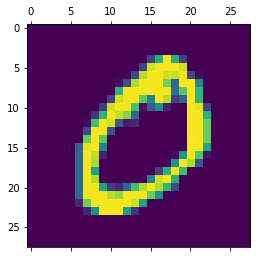

In [105]:
plt.matshow(X_train[1])

In [106]:
y_train[1]

0

In [107]:
X_train.shape

(60000, 28, 28)

In [108]:
X_train_flattened = np.reshape(X_train, (60000, -1))
X_test_flattened = np.reshape(X_test, (10000, -1))

In [109]:
test_flatten.shape

(60000, 784)

In [110]:
X_test_flattened.shape

(10000, 784)

In [111]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 69us/sample - loss: 2.0252 - acc: 0.3510
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 1.5593 - acc: 0.4092
Epoch 3/5
60000/60000 [==============================] - 4s 65us/sample - loss: 1.4930 - acc: 0.4266
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 1.4544 - acc: 0.4464
Epoch 5/5
60000/60000 [==============================] - 4s 64us/sample - loss: 1.4333 - acc: 0.4613


Not scaling the values might be the reason for such low accuracy. So let's scale the values

In [112]:
X_train = X_train/255
X_test = X_test/255

In [113]:
X_train_flattened = np.reshape(X_train, (60000, -1))
X_test_flattened = np.reshape(X_test, (10000, -1))

In [114]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4856 - acc: 0.8781
Epoch 2/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3059 - acc: 0.9156
Epoch 3/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2859 - acc: 0.9212
Epoch 4/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2749 - acc: 0.9240
Epoch 5/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2676 - acc: 0.9265


In [115]:
model.evaluate(X_test_flattened, y_test)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.2680 - acc: 0.9266


[0.26799655566513536, 0.9266]

In [116]:
predicted_values = model.predict(X_test_flattened)

In [117]:
predicted_values

array([[2.02655792e-05, 0.00000000e+00, 5.21242619e-05, ...,
        7.56465077e-01, 9.88245010e-05, 6.04718924e-04],
       [3.53753567e-04, 2.02655792e-06, 5.23366570e-01, ...,
        0.00000000e+00, 1.02728605e-04, 0.00000000e+00],
       [1.81794167e-06, 5.15873015e-01, 1.00755095e-02, ...,
        8.97169113e-04, 3.64771485e-03, 2.66462564e-04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.76837158e-06, 1.58548355e-05, 4.28557396e-05],
       [2.98023224e-08, 0.00000000e+00, 8.94069672e-08, ...,
        0.00000000e+00, 4.70191240e-04, 0.00000000e+00],
       [8.94069672e-08, 0.00000000e+00, 1.87754631e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], dtype=float32)

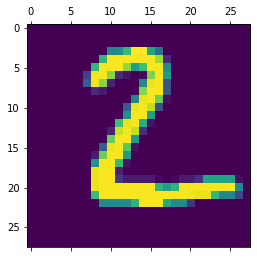

In [118]:
plt.matshow(X_test[1])

In [119]:
index = 1
print(predicted_values[index])
print("\n")
print("Predicted value is : " + str(np.argmax(predicted_values[index])))

[3.53753567e-04 2.02655792e-06 5.23366570e-01 2.18451023e-04
 0.00000000e+00 3.51181626e-03 1.68961287e-03 0.00000000e+00
 1.02728605e-04 0.00000000e+00]


Predicted value is : 2


In [120]:
final_predicted_values = [np.argmax(i) for i in predicted_values]

In [121]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=final_predicted_values)

In [124]:
print(cm)

Tensor("confusion_matrix_4/SparseTensorDenseAdd:0", shape=(10, 10), dtype=int32)


In [123]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm)

ValueError: Must pass 2-d input. shape=()

<Figure size 720x504 with 0 Axes>

In [127]:
tf.__version__

'1.14.0'